# 🧠 Predicción de Riesgo de Crédito – German Credit Dataset

## 📌 Contexto del problema

Cuando un banco recibe una solicitud de préstamo, debe decidir si aprueba o no el crédito con base en el perfil del solicitante. Existen dos tipos de riesgo:

- Si el solicitante es un **buen riesgo crediticio** (es decir, probablemente pagará), y se **rechaza** su solicitud, el banco **pierde una oportunidad de negocio**.
- Si el solicitante es un **mal riesgo crediticio** (es decir, probablemente no pagará), y se **aprueba** su solicitud, el banco **asume una pérdida financiera**.

Este dataset incluye 1000 registros con 20 variables predictoras, además de la clasificación `Creditability` (bueno o malo), que es lo que intentaremos predecir.

---
## 🕰️ Consideraciones históricas y monetarias

Este dataset fue recolectado antes de la adopción del euro (€) como moneda oficial en Alemania. Por lo tanto:

- Todas las cantidades monetarias (como `Credit_Amount`, `Savings/Stocks`, etc.) están expresadas en **marcos alemanes (Deutsche Mark, DM)**.
- Alemania cambió al euro en el año **2002**, y el tipo de cambio final fue:
  > **1 EUR = 1.95583 DM**

Aunque no es necesario convertir las cantidades a euros para el análisis (ya que se trabajará con modelos relativos), **es importante tener presente este contexto**:

- Las cifras no representan montos actuales.
- Los rangos de ingreso, empleo y ahorro deben interpretarse en relación al estándar de vida en Alemania antes del 2002.
- Este detalle puede influir en la interpretación del poder adquisitivo y la clasificación del riesgo crediticio en su momento.

🔎 *Conclusión: trabajaremos con las cifras tal como están, pero entendiendo que no corresponden al valor monetario moderno.*

---

## 🧾 Diccionario completo de variables 

- `Creditability`: Variable objetivo.  
  1 = Buen riesgo crediticio  
  0 = Mal riesgo crediticio

- `Account_Balance`: Estado de la cuenta bancaria  
  1 = Sin cuenta  
  2 = Menos de 0 DM  
  3 = Entre 0 y 200 DM  
  4 = Más de 200 DM o salario recibido por transferencia

- `Duration_of_Credit_monthly`: Duración del crédito en meses (variable numérica)

- `Payment_Status_of_Previous_Credit`: Estado de pagos anteriores  
  0 = Ninguno / sin historial  
  1 = Retrasos o problemas críticos  
  2 = Demoras leves o esporádicas  
  3 = Pagos al día  
  4 = Sin deudas

- `Purpose`: Motivo del crédito  
  0 = No especificado  
  1 = Carro nuevo  
  2 = Usado  
  3 = Muebles  
  4 = Radio/televisión  
  5 = Electrodomésticos  
  6 = Reparaciones  
  8 = Vacaciones  
  9 = Renovaciones  
  10 = Educación

- `Credit_Amount`: Monto del crédito solicitado (en Deutsche Mark - DM)

- `Value_Savings_Stocks`: Valor de ahorros/inversiones  
  1 = Ninguno  
  2 = Menos de 100 DM  
  3 = Entre 100 y 500 DM  
  4 = Entre 500 y 1000 DM  
  5 = Más de 1000 DM

- `Length_of_current_employment`: Antigüedad laboral  
  1 = Desempleado / <1 año  
  2 = 1 a <4 años  
  3 = 4 a <7 años  
  4 = 7 a <10 años  
  5 = Más de 10 años

- `Instalment_per_cent`: Porcentaje de la cuota mensual respecto al ingreso (valor entre 1 y 4)

- `Sex_Marital_Status`: Género y estado civil  
  1 = Hombre soltero/divorciado  
  2 = Hombre casado/viudo  
  3 = Mujer soltera  
  4 = Mujer casada

- `Guarantors`: Avales  
  1 = Ninguno  
  2 = Cónyuge  
  3 = Otro garante

- `Duration_in_Current_address`: Tiempo en años en la residencia actual

- `Most_valuable_available_asset`: Bien más valioso disponible  
  1 = Auto propio  
  2 = Seguro de vida  
  3 = Bien inmueble  
  4 = Ninguno

- `Age_years`: Edad del solicitante (años)

- `Concurrent_Credits`: Otros créditos activos  
  1 = Ninguno  
  2 = Tiendas  
  3 = Otros bancos

- `Type_of_apartment`: Tipo de vivienda  
  1 = Alquilada  
  2 = Propia  
  3 = Sin costo

- `No_of_Credits_at_this_Bank`: Número de créditos actuales con el banco

- `Occupation`: Ocupación  
  1 = Desempleado / no calificado  
  2 = Obrero calificado  
  3 = Empleado / funcionario  
  4 = Autónomo / alta calificación

- `No_of_dependents`: Número de personas a cargo (1 o 2)

- `Telephone`: Teléfono registrado  
  1 = No  
  2 = Sí

- `Foreign_Worker`: ¿Es trabajador extranjero?  
  1 = Sí  
  2 = No

---

## 📚 Fuente y referencia

Este dataset es parte del curso *Stat 508* de Penn State University.  
📎 [Documentación oficial del dataset](https://online.stat.psu.edu/stat508/resource/analysis/gcd)


In [1]:
# Librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset
df = pd.read_csv("../data/Credit_Data.csv", sep=';')



# 🧩 Analisis de los datos cargados

Despues de cargar los Datos procedemos a analizar los datos obtenidos del dataset con el fin de identificar si hay datos nulos o incompletos 



In [2]:
df.head()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


Inicialmente podemos evidenciar que se cargo el dataset de manera correcta evidenciando algunos datos y las 21 columnas que contiene

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account_Balance                    1000 non-null   int64
 2   Duration_of_Credit_monthly         1000 non-null   int64
 3   Payment_Status_of_Previous_Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit_Amount                      1000 non-null   int64
 6   Value_Savings_Stocks               1000 non-null   int64
 7   Length_of_current_employment       1000 non-null   int64
 8   Instalment_per_cent                1000 non-null   int64
 9   Sex_Marital_Status                 1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration_in_Current_address        1000 non-null   int64
 12  Most_valuable_availab

Con esta función logramos identificar en primer lugar que no hay datos vacios, es decir que todas las filas del dataset nos van a servir para el analisís, por otro lado tenemos que todos los datos de las columnas son de tipo numerico, por lo tanto para su desarrollo vamos a seguir el diccionario que mostramos en la parte superior del documento.


In [4]:
df.describe()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


Con esta función ya aplicamos un poco mas de estadistica descritiva en donde encontramos el promedio de las variables junto a su desviación estandar, ademas que los cuartiles donde podemos ver que tan dispersos estan los datos en los cuartiles descritos.

In [5]:
df.duplicated().sum()

0

Aqui nos damos cuenta que no tenemos ningun dato repetido dentro del dataset 


In [10]:
# Lista de columnas categóricas codificadas con números
categorical_cols = [
    'Creditability',  # Variable objetivo binaria
    'Account_Balance',
    'Payment_Status_of_Previous_Credit',
    'Purpose',
    'Value_Savings_Stocks',
    'Length_of_current_employment',
    'Instalment_per_cent',
    'Sex_Marital_Status',
    'Guarantors',
    'Most_valuable_available_asset',
    'Concurrent_Credits',
    'Type_of_apartment',
    'No_of_Credits_at_this_Bank',
    'Occupation',
    'No_of_dependents',
    'Duration_in_Current_address',
    'Telephone',
    'Foreign_Worker'
]


# Convertirlas a tipo 'category'
for col in categorical_cols:
    df[col] = df[col].astype('category')
    
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Creditability                      1000 non-null   category
 1   Account_Balance                    1000 non-null   category
 2   Duration_of_Credit_monthly         1000 non-null   int64   
 3   Payment_Status_of_Previous_Credit  1000 non-null   category
 4   Purpose                            1000 non-null   category
 5   Credit_Amount                      1000 non-null   int64   
 6   Value_Savings_Stocks               1000 non-null   category
 7   Length_of_current_employment       1000 non-null   category
 8   Instalment_per_cent                1000 non-null   category
 9   Sex_Marital_Status                 1000 non-null   category
 10  Guarantors                         1000 non-null   category
 11  Duration_in_Current_address        1000 non-

Ahora empezamos con un tratamiento de datos de tal forma que las que antes eran variables numericas las converitimos en categorica y mantenemos en enteras las variables que son netamente valores.

## Comprobamos los Diccionarios


In [19]:
# Validar códigos para Account_Balance (esperados: 1–4)
for col in categorical_cols:
    print(df[col].value_counts().sort_index())

Creditability
0    300
1    700
Name: count, dtype: int64
Account_Balance
1    274
2    269
3     63
4    394
Name: count, dtype: int64
Payment_Status_of_Previous_Credit
0     40
1     49
2    530
3     88
4    293
Name: count, dtype: int64
Purpose
0     234
1     103
2     181
3     280
4      12
5      22
6      50
8       9
9      97
10     12
Name: count, dtype: int64
Value_Savings_Stocks
1    603
2    103
3     63
4     48
5    183
Name: count, dtype: int64
Length_of_current_employment
1     62
2    172
3    339
4    174
5    253
Name: count, dtype: int64
Instalment_per_cent
1    136
2    231
3    157
4    476
Name: count, dtype: int64
Sex_Marital_Status
1     50
2    310
3    548
4     92
Name: count, dtype: int64
Guarantors
1    907
2     41
3     52
Name: count, dtype: int64
Most_valuable_available_asset
1    282
2    232
3    332
4    154
Name: count, dtype: int64
Concurrent_Credits
1    139
2     47
3    814
Name: count, dtype: int64
Type_of_apartment
1    179
2    714
3    1

De esta forma comprobamos que todas las variables categoricas estan realcionadas con su diccionario

# Pasamos a verificar los rangos en las variables numericas 


In [15]:
print(df['Age_years'].describe())

count    1000.00000
mean       35.54200
std        11.35267
min        19.00000
25%        27.00000
50%        33.00000
75%        42.00000
max        75.00000
Name: Age_years, dtype: float64


Para la variable Duration_of_Credit_monthly, denotamos que la edad minima del dataset es 19 años lo cual concuerda con lo estimado a pedir un credito apenas se cumple los 18, por otro lado vemos que la edad mas longeva que hay dentro del dataset es de 75 por lo que tenemos que la edad entre el dataset es de 19 a 75 .

In [16]:
print(df['Duration_of_Credit_monthly'].describe())

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: Duration_of_Credit_monthly, dtype: float64


Para la variable Duration_of_Credit_monthly, denotamos que la duración minima de un credito dentro del dataset es 4 meses y por otro lado vemos que la duración maxima de los creditos dentro del dataset es de 72.

In [18]:
print(df['Credit_Amount'].describe())

count     1000.00000
mean      3271.24800
std       2822.75176
min        250.00000
25%       1365.50000
50%       2319.50000
75%       3972.25000
max      18424.00000
Name: Credit_Amount, dtype: float64


Para la variable Credit_Amount, denotamos que el valor minimo dentro de una cuenta dentro del dataset es 250 Deutsche Mark(DM) y por otro lado vemos que el valor maximo dentro de una cuenta es de 18424 Deutsche Mark(DM).

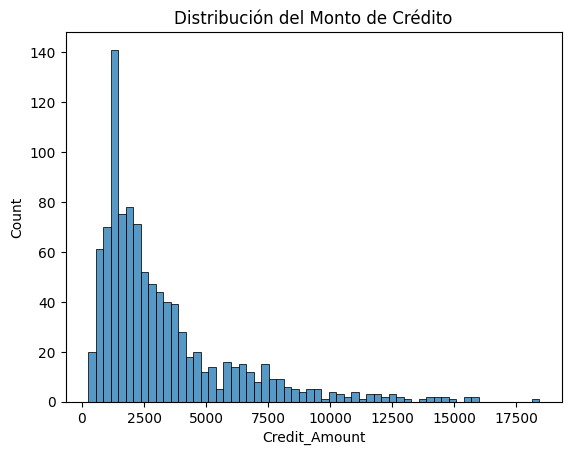

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Credit_Amount'], bins=60)
plt.title("Distribución del Monto de Crédito")
plt.show()


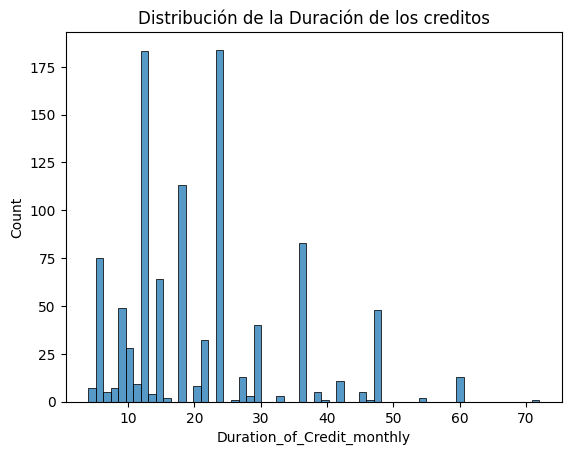

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Duration_of_Credit_monthly'], bins=60)
plt.title("Distribución de la Duración de los creditos")
plt.show()

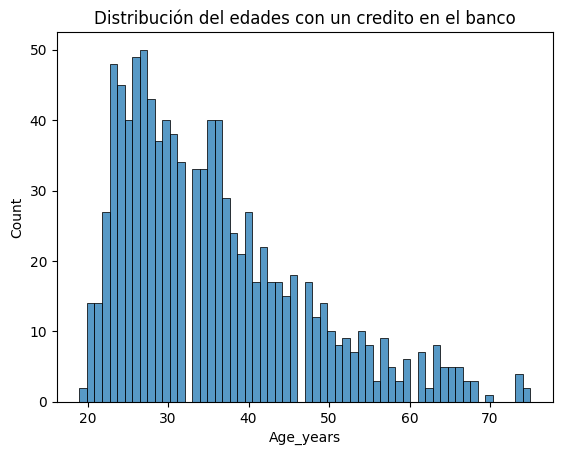

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age_years'], bins=60)
plt.title("Distribución del edades con un credito en el banco")
plt.show()